In [1]:
# Importing needed libraries
#!pip install category_encoders
#!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, classification_report, confusion_matrix, f1_score, make_scorer, recall_score, precision_score
from sklearn.model_selection import KFold, cross_validate
from sklearn.feature_selection import RFE, RFECV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading in data
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
# checking the first five columns of the data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# obtaining relevant information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# viewing relevant summary statistics of each numerical column in the data.
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Setting the figure size for all figures in this notebook
plt.rcParams['figure.figsize'] = [12,7]

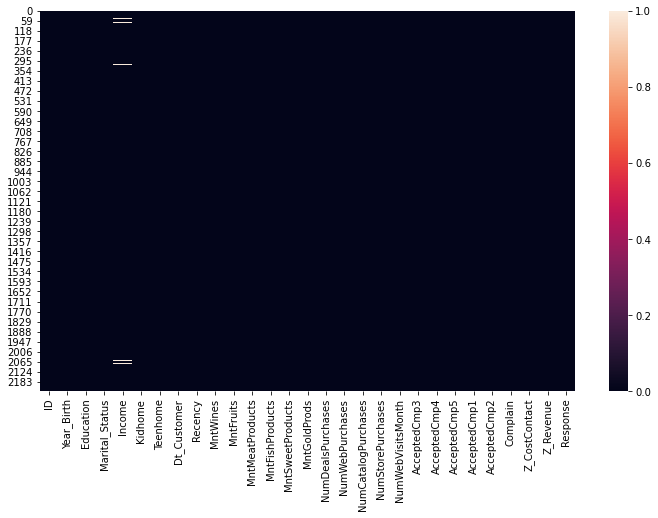

In [7]:
# creating a heatmap of missing data in the dataset; the heatmap shows only the income column has missing data.
sns.heatmap(df.isna())

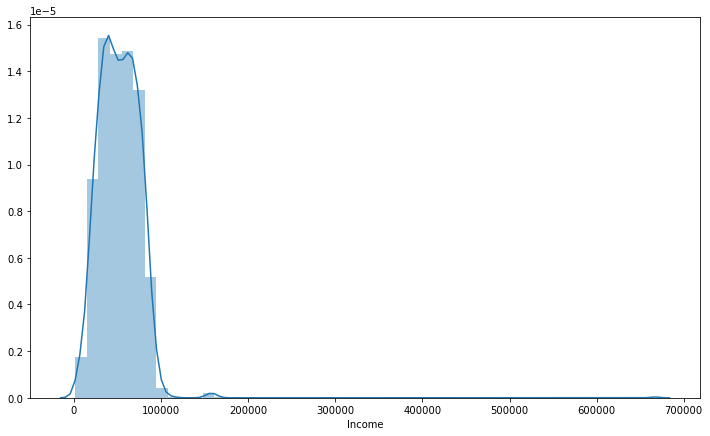

In [8]:
# creating a distribution plot of the income column to better understand the distribution of the income of customers.
sns.distplot(df.Income)

In [9]:
# checking confirm the total number of missing data in each column
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# checking to see the distribution of classes for the missing income data in the dataset.
df[df.Income.isna()]["Response"]

10      0
27      0
43      0
48      0
58      0
71      0
90      0
91      0
92      0
128     0
133     0
312     0
319     0
1379    0
1382    0
1383    0
1386    0
2059    0
2061    0
2078    0
2079    0
2081    0
2084    1
2228    0
Name: Response, dtype: int64

In [11]:
# checking the distribution of the classes in the output variable. The result shows the dataset is imbalanced with the
# No Response output dominating the output class
df.Response.value_counts(normalize=True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

Income has only 24 of its 2240 entries missing. Since most of the data is centered around the mean, with a few outliers (seen in the distribution plot) and the one of the important classes has a missing income, the average income would be used to fill the missing values. Although the actual income for the data point being filled may be higher or lower than this value, this would be used as the best guess for those missing Income.

In [12]:
# filling the missing data in the Income column using the average Income in the dataset
df.fillna(value=df.Income.mean(), axis=1, inplace=True)

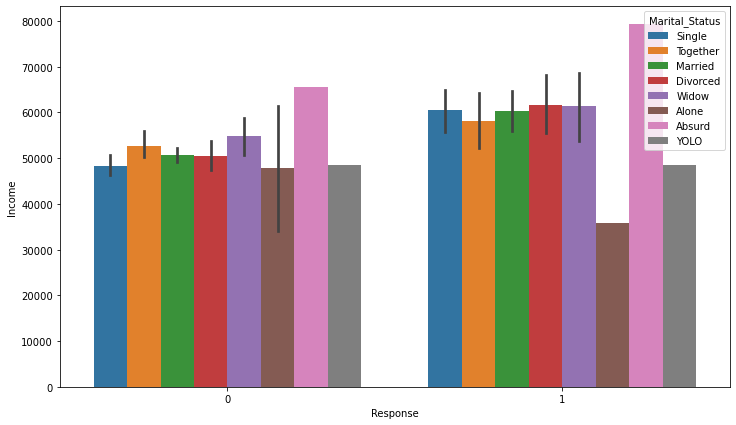

In [13]:
# Creating a barplot to check the distribution of income in each of the classes and in each of the marital status for each 
# customer.
sns.barplot(x=df.Response, y=df.Income, hue=df.Marital_Status)

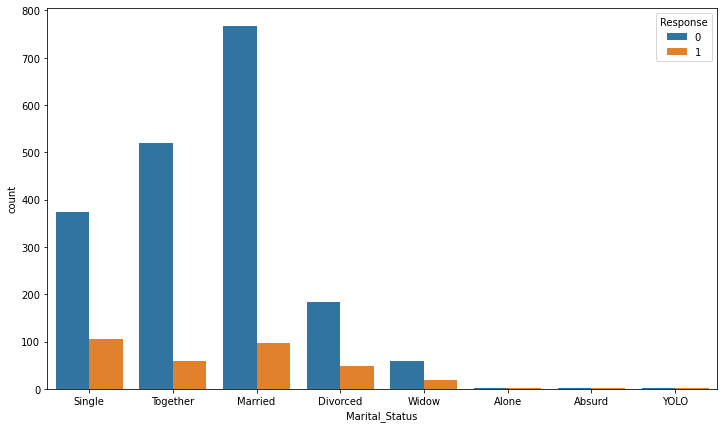

In [14]:
# creating a countplot to see the distribution of customers by marital status and response to the last add campaign. A more 
# view of the response for the last six campaigns is done in Tableau in an interactive dashboard. Tableau makes it easier to 
# the assess and filter the distribution of customers by multiple factors. 
sns.countplot(df.Marital_Status, hue=df.Response)

To better assess this distribution, a closer look at this distribution is shown in the next two plots.

In [15]:
# summing up the counts of the customers grouped by their response and marital status
sum_0 = df.groupby(["Response", "Marital_Status"]).count()['ID'][0].sum()
sum_1 = df.groupby(["Response", "Marital_Status"]).count()['ID'][1].sum()

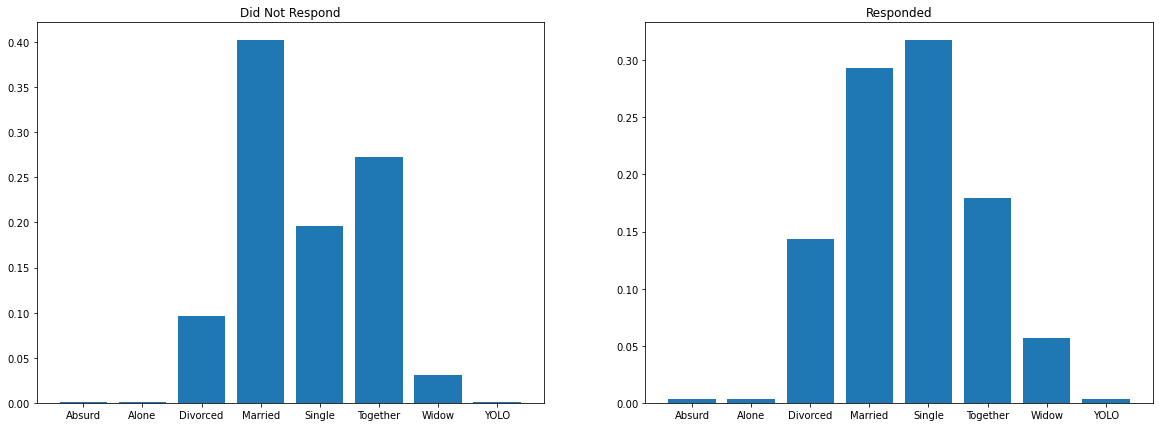

In [16]:
# creating a plot of the distribution of customers based on their response and marital status. 
# This distributions shows the dominating marital status in each of the response group.
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.bar((df.groupby(["Response", "Marital_Status"]).count()['ID'][0]/sum_0).index,
       (df.groupby(["Response", "Marital_Status"]).count()['ID'][0]/sum_0))
ax2.bar((df.groupby(["Response", "Marital_Status"]).count()['ID'][1]/sum_1).index,
       (df.groupby(["Response", "Marital_Status"]).count()['ID'][1]/sum_1))
ax1.title.set_text("Did Not Respond")
ax2.title.set_text("Responded")

In the above plot, the dominating marital status in the group that responded to the last campaign is the group of customers that identified as being single, the second highest responders are married customers.    
In the group that did not respond to the last marketing campaign, customers that identified as married have the highest proportion of non-response followed by customers that identfied their marital status as together.  
Further analysis of the proportion of responders and non responders in each marital status group is shown below; more of this analysis including response to the last six campaigns is done in Tableau

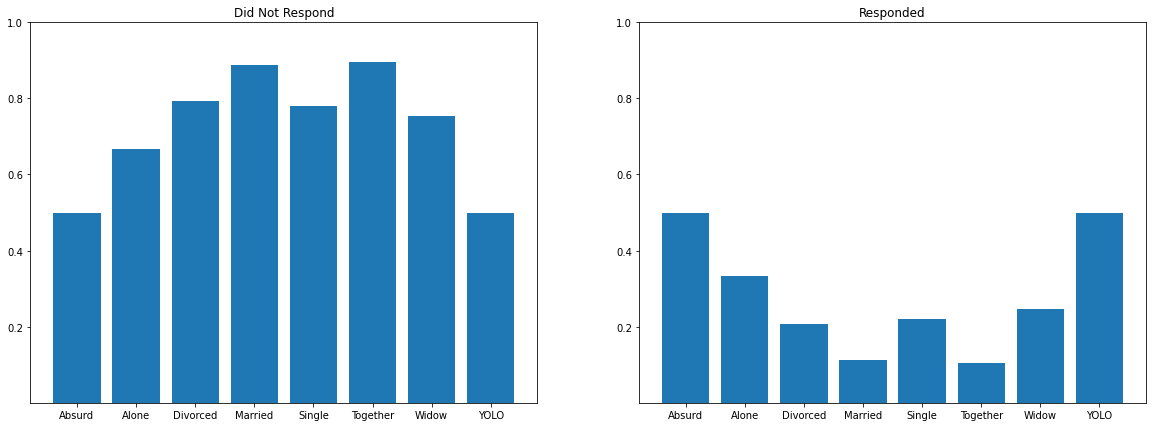

In [17]:
# generating the proportion of customers in each marital status that responded and did not respond to the last marketing
# campaign
index0 = (df.groupby(["Response", "Marital_Status"]).count()['ID'][0]/df.groupby("Marital_Status").count()["Response"]).index
index1 = (df.groupby(["Response", "Marital_Status"]).count()['ID'][1]/df.groupby("Marital_Status").count()["Response"]).index
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.bar(index0, (df.groupby(["Response", "Marital_Status"]).count()['ID'][0]/df.groupby("Marital_Status").count()["Response"]))
ax2.bar(index1, (df.groupby(["Response", "Marital_Status"]).count()['ID'][1]/df.groupby("Marital_Status").count()["Response"]))
ax1.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax2.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax1.title.set_text("Did Not Respond")
ax2.title.set_text("Responded")

From the plot above, it can be seen that of only about approximately, 15% of the total number of married customers responded to the last marketing campaign. The other 85% did not respond to the campaign. Although the previous distribution showed that married customers made up about 37% of the group that responded, this proportion pales in comparison to the actual number of married customers that the last marketing campaign was sent to.   
Of the total number of customers who identified as "Single", approximately 22% of them responded to the last marketing campaign.This makes them the highest responding groups among all the marital groups for the last marketing campaign.   
Absurd and YOLO each have only 2 customers belonging to the group. This number pales in comparison to the number of customers in other groups. The group "Alone" has only 3 customers belonging to it.

More analysis and interactive visualization is done in Tableau

In [18]:
# Converting the data type of the date customers from an object to a datetime format and extracting the year to be used in this
# for analysis
df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer).dt.year

In [19]:
# Dropping the customer entries with strong outlier income to reduce the noise in the data during modeling
df.drop(list(df[df.Income >= 100000].index), inplace=True)

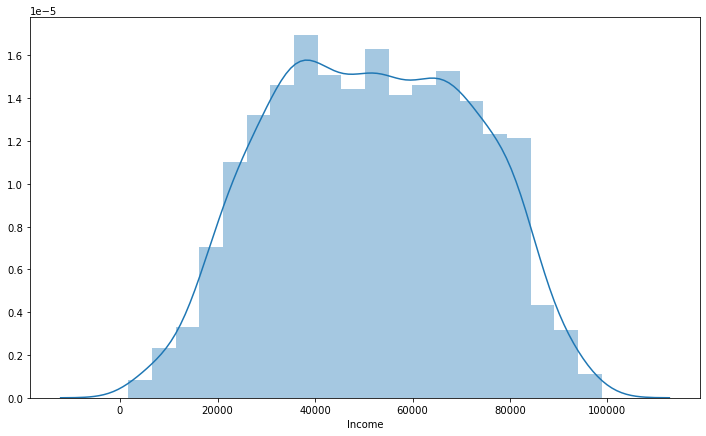

In [20]:
# creating a distribution plot of the Income column after dropping these outliers.
sns.distplot(df["Income"])

In [21]:
# selecting columns that would be converted to categorical columns and columns that are constants and identfiers to drop
columns_to_categorical = ["Education", "Marital Status"]
columns_to_drop = ["ID", "Z_CostContact", "Z_Revenue"]

In [22]:
# dropping columns that do not add information that could be used in modelling.
df.drop(columns_to_drop, axis =1, inplace=True)

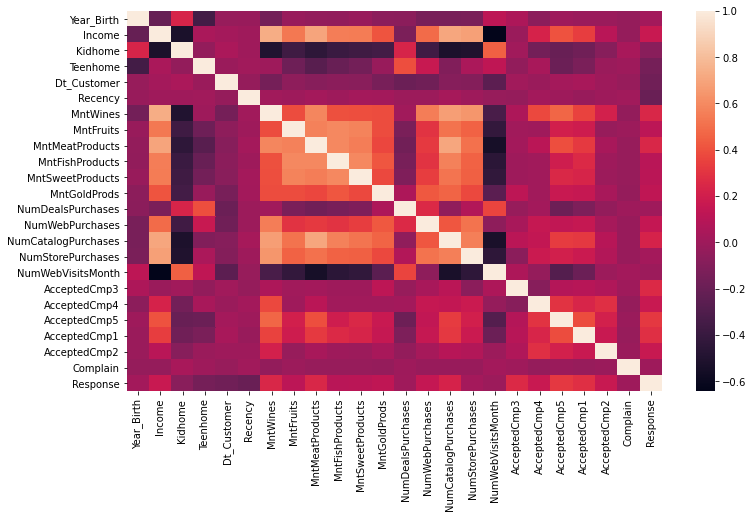

In [23]:
# creating a heatmap of the correlation of numerical columns in the dataframe of the marketing campaign dataset.
sns.heatmap(df.corr())

The heatmap shows low to medium negative and positive correlation between all the numerical variables in the dataset. This is in concordance with scatter plots of a combination of various variables in the dataset that was generated in Tableau.

In [24]:
# Preparing the dataset for modeling; encoding categorical features, Education and Marital Status.
X = df.drop("Response", axis =1)
y = df.Response
encoder=ce.OneHotEncoder()
encoder.fit(X,y)
X = encoder.transform(X)
scaler = StandardScaler()

In [25]:
# Splitting the data into train and test sets and scaling it using standard scaler.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=10)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Feature Selection

In [26]:
# Performing feature selection to select 25 most important variables identified using recursive feature selection with L2 
# Logistic regression model as the estimator. This would help in easing the modelling process and reducing the chances of 
# the model overfitting to the dataset.
estimator = LogisticRegression()
selector = RFECV(estimator, min_features_to_select=25,cv=5,scoring=make_scorer(recall_score) )
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)

### Model Selection

Five classification algorithms are explored in this model selection process. These models are L1 and L2 logistic regression, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbour and XGBoost Classifier. In this section, this models are tuned with 5-fold cross validation and using the evaluation metric recall_score. Recall_score was chosen because for an email marketing campaign, the recall is more important than precision because we want to minimize the False Negatives and send email campaign messages to all customers that have higher tendencies to respond to our campaign.

#### L1 and L2 Logistic Regression Models

In [27]:
param_grid_lg1 = {'solver': ['liblinear','saga' ],
                 'C': [0.2,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9,1.0]}
folds = KFold(n_splits = 5, random_state=1,shuffle=True)
param_search_lg1 = GridSearchCV(estimator=LogisticRegression(penalty='l1'),scoring=make_scorer(recall_score),
                                param_grid=param_grid_lg1,n_jobs=4,cv=folds,verbose=1)
param_search_lg1.fit(X_train,y_train)
print('Best Score is:', param_search_lg1.best_score_, 'and Best model is:', param_search_lg1.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    1.9s


Best Score is: 0.46455141785280807 and Best model is: LogisticRegression(C=0.9, penalty='l1', solver='liblinear')


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [28]:
param_gridlg2 = {'solver': ['newton-cg', 'lbfgs', 'sag','saga' ],
              'C': [10.0,12.0,15.0, 16.0, 17.0, 18.0]}
folds = KFold(n_splits = 10, random_state=1, shuffle=True)
param_searchlg2 = GridSearchCV(estimator=LogisticRegression(max_iter=1000),param_grid=param_gridlg2,scoring=make_scorer(recall_score),
                               n_jobs=4,cv=folds,verbose=1)
param_searchlg2.fit(X_train,y_train)
print('Best Score is:', param_searchlg2.best_score_, 'and Best model is:', param_searchlg2.best_estimator_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 233 out of 240 | elapsed:    8.9s remaining:    0.2s


Best Score is: 0.45140277454855465 and Best model is: LogisticRegression(C=16.0, max_iter=1000)


[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    9.5s finished


##### Decision Tree Algorithm

In [29]:
param_gridDT = { "min_samples_split": [ 1, 2, 3, 4, 5, 10],
                "max_depth": [50,150,200],
                "max_leaf_nodes": [100,150,200]}
folds = KFold(n_splits = 5, random_state=1)
param_searchDT = GridSearchCV(estimator = DecisionTreeClassifier(criterion='entropy'), scoring=make_scorer(recall_score),
                              param_grid = param_gridDT, cv= folds,n_jobs=4,verbose=1)
param_searchDT.fit(X_train,y_train)
print('Best Score for DT is: ',param_searchDT.best_score_, 'and the Best parameters for the model is: ', 
      param_searchDT.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score for DT is:  0.4801927980229867 and the Best parameters for the model is:  {'max_depth': 200, 'max_leaf_nodes': 200, 'min_samples_split': 10}


[Parallel(n_jobs=4)]: Done 220 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:    0.8s finished


##### Random Forest Algorithm

In [30]:
model_RF = RandomForestClassifier()
param_gridRF = {"n_estimators": [1,2,3,4,5,6],
              "max_depth": [20, 50, 100,120,150],
              "bootstrap": [True, False] }
grid_searchRF = GridSearchCV(estimator = model_RF, param_grid=param_gridRF, n_jobs=4, scoring=make_scorer(recall_score),
                             refit=True, verbose=1, cv=folds)
grid_searchRF.fit(X_train, y_train)
print('Best Score for Random Forest is: ',grid_searchRF.best_score_, 'and the Best parameters for the model are: ',
      grid_searchRF.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 205 tasks      | elapsed:    1.0s


Best Score for Random Forest is:  0.43507766837955525 and the Best parameters for the model are:  {'bootstrap': False, 'max_depth': 150, 'n_estimators': 1}


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.4s finished


##### K Nearest Neighbour Algorithm

In [31]:
n_neighbours = [1,2,3,4,5,7]
folds = KFold(n_splits = 5, random_state=1)
for i in n_neighbours:
    model = KNeighborsClassifier(n_neighbors = i,n_jobs=-1)
    cross_valknn= cross_validate(estimator=model,X=X_train,y=y_train,cv=folds,scoring=make_scorer(recall_score))
    mean_cvscore_knn = cross_valknn['test_score'].mean()
    std_cvscore_knn = cross_valknn['test_score'].std()
    print('for a K of ', i ,'mean recall score is ' , mean_cvscore_knn,'and the standard deviation across folds is ',
          std_cvscore_knn)

for a K of  1 mean recall score is  0.3962417134115247 and the standard deviation across folds is  0.042569192691702354
for a K of  2 mean recall score is  0.16399364531440003 and the standard deviation across folds is  0.041133517156481385
for a K of  3 mean recall score is  0.2682775663907739 and the standard deviation across folds is  0.025619868649400346
for a K of  4 mean recall score is  0.14070823363276194 and the standard deviation across folds is  0.04258214798858782
for a K of  5 mean recall score is  0.19658239516730083 and the standard deviation across folds is  0.03862929557266247
for a K of  7 mean recall score is  0.17447161966029892 and the standard deviation across folds is  0.009935703111647017


##### XGBOOST

In [32]:
param_grid_xgb = {'n_estimators': [20,30,40,50,60,80,100],
                 'max_depth': [20,30,40,50,70],
                 'sampling_method':['uniform', 'gradient_based'],
                 'tree_method': ['approx', 'hist'],
                 'learning_rate':[0.5,1.0,1.5,2.0],
                 'lambda': [0,0.5,1.0],
                'alpha': [0,0.5,1.0]}
param_searchXGB = GridSearchCV(estimator =XGBClassifier(),param_grid = param_grid_xgb, scoring=make_scorer(recall_score),
                               cv= folds,n_jobs=4,verbose=1)
param_searchXGB.fit(X_train,y_train)
print('Best Score for SVC is: ',param_searchXGB.best_score_, 'and the Best parameters for the model are: ', param_searchXGB.best_params_)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 352 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 852 tasks      | elapsed:   33.9s
[Parallel(n_jobs=4)]: Done 1552 tasks      | elapsed:   55.2s
[Parallel(n_jobs=4)]: Done 2452 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3552 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 4852 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 6352 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 8052 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 9952 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 12052 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 14352 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 16852 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 19552 tasks      | elapsed: 12.3min
[Parallel(n_jobs=4)]: Done 22452 tasks      | elapsed: 1

Best Score for SVC is:  0.5252422233554309 and the Best parameters for the model are:  {'alpha': 0, 'lambda': 0, 'learning_rate': 2.0, 'max_depth': 20, 'n_estimators': 40, 'sampling_method': 'uniform', 'tree_method': 'hist'}


The cross validation recall score for each algorithm used with the unbalanced dataset is less than or just around 50% which is not good enough. To increase the tendency of getting a model with a better recall, the original dataset for training would be resampled. The dominating class would be downsampled and each of the algorithms would be applied on the downsampled training set.

#### Downsampling the dataset

In [33]:
# Downsampling the dataset.
np.random.seed(1)
indexes0 = list(np.random.choice(y[y==0].index, size = 330, replace=False))
y_sampled = y[indexes0]
X_sampled = X.loc[indexes0]
y_ones = y[y==1]
X_ones = X.loc[y[y==1].index]
X_new = pd.concat([X_ones, X_sampled])
y_new = pd.concat([y_ones, y_sampled])

In [34]:
# checking to ensure the new dataset is balanced.
y_new.value_counts(normalize=True)

1    0.5
0    0.5
Name: Response, dtype: float64

In [35]:
# putting together the remaining data points from the dominating class
X_remaining = X.drop(indexes0 + list(y_ones.index))
y_remaining = y.drop(indexes0 + list(y_ones.index))

In [36]:
# splitting the downsampled set into a training and a validation set and merging the remaining data, from the downsampling the 
# dominating class, to the test set. This is done to ensure the test set is a good representation of the population the model 
# would be applied to; next, the data is scaled using standard scaler. 
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.30, random_state=10)
X_test = pd.concat([X_test, X_remaining])
y_test = pd.concat([y_test, y_remaining])
new_scaling = StandardScaler()
X_train = new_scaling.fit_transform(X_train)
X_test = new_scaling.transform(X_test)

In [37]:
# checking the class distribution in the training set
y_train.value_counts(normalize=True)

0    0.519481
1    0.480519
Name: Response, dtype: float64

In [38]:
# checking to ensure the test set is a representation of the population of the model would be applied tod
y_test.value_counts(normalize=True)

0    0.93881
1    0.06119
Name: Response, dtype: float64

In [39]:
# Performing feature selection to select 25 most important variables identified using recursive feature selection with L2 
# Logistic regression model as the estimator. This would help in easing the modelling process and reducing the chances of 
# the model overfitting to the dataset.
estimator = LogisticRegression()
selector = RFECV(estimator, min_features_to_select=25,cv=5,scoring=make_scorer(f1_score) )
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

### Model Selection using the Downsampled Dataset

Five classification algorithms are explored in this model selection process. These models are L1 and L2 logistic regression, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbour and XGBoost Classifier. In this section, this models are tuned with 5-fold cross validation and using the evaluation metric recall_score. Recall_score was chosen because for an email marketing campaign, the recall is more important than precision because we want to minimize the False Negatives and send email campaign messages to all customers that have higher tendencies to respond to our campaign.

#### L1 and L2 Logistic Regression Models

In [40]:
param_grid_lg1 = {'solver': ['liblinear','saga' ],
                 'C': [0.2,0.2,0.3,0.4,0.5,0.6,0.7,.8,0.9,1.0]}
folds = KFold(n_splits = 10, random_state=1,shuffle=True)
param_search_lg1 = GridSearchCV(estimator=LogisticRegression(penalty='l1'),scoring=make_scorer(recall_score),
                                param_grid=param_grid_lg1,n_jobs=4,cv=folds,verbose=1)
param_search_lg1.fit(X_train,y_train)
print('Best Score is:', param_search_lg1.best_score_, 'and Best model is:', param_search_lg1.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 165 tasks      | elapsed:    1.4s


Best Score is: 0.7850523912081997 and Best model is: LogisticRegression(penalty='l1', solver='liblinear')


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.7s finished


In [41]:
param_gridlg2 = {'solver': ['newton-cg', 'lbfgs', 'sag','saga' ],
              'C': [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24]}
folds = KFold(n_splits = 10, random_state=1, shuffle=True)
param_searchlg2 = GridSearchCV(estimator=LogisticRegression(max_iter=1000),param_grid=param_gridlg2,scoring=make_scorer(recall_score),
                               n_jobs=4,cv=folds,verbose=1)
param_searchlg2.fit(X_train,y_train)
print('Best Score is:', param_searchlg2.best_score_, 'and Best model is:', param_searchlg2.best_estimator_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.1s


Best Score is: 0.802400217295156 and Best model is: LogisticRegression(C=0.24, max_iter=1000, solver='newton-cg')


[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:    1.4s finished


##### Decision Tree Algorithm

In [42]:
param_gridDT = { "min_samples_split": [3, 4, 5, 10],
                "max_depth": [150,200,250,300],
                "max_leaf_nodes": [100,150,200]}
folds = KFold(n_splits = 5, random_state=1)
param_searchDT = GridSearchCV(estimator = DecisionTreeClassifier(criterion='entropy'), scoring=make_scorer(recall_score),
                              param_grid = param_gridDT, cv= folds,n_jobs=4,verbose=1)
param_searchDT.fit(X_train,y_train)
print('Best Score for DT is: ',param_searchDT.best_score_, 'and the Best parameters for the model is: ', 
      param_searchDT.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Score for DT is:  0.7352402476611821 and the Best parameters for the model is:  {'max_depth': 300, 'max_leaf_nodes': 150, 'min_samples_split': 4}


[Parallel(n_jobs=4)]: Done 190 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    0.4s finished


##### Random Forest Algorithm

In [43]:
model_RF = RandomForestClassifier()
param_gridRF = {"n_estimators": [1,2,3,4,5,6],
              "max_depth": [20, 50, 100,120,150],
              "bootstrap": [True, False] }
grid_searchRF = GridSearchCV(estimator = model_RF, param_grid=param_gridRF, n_jobs=4, scoring=make_scorer(recall_score),
                             refit=True, verbose=1, cv=folds)
grid_searchRF.fit(X_train, y_train)
print('Best Score for Random Forest is: ',grid_searchRF.best_score_, 'and the Best parameters for the model are: ',
      grid_searchRF.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Score for Random Forest is:  0.7774298514576725 and the Best parameters for the model are:  {'bootstrap': False, 'max_depth': 120, 'n_estimators': 5}


[Parallel(n_jobs=4)]: Done 205 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.7s finished


##### K Nearest Neighbour Algorithm

In [44]:
n_neighbours = [2,3,4,5,11,15,]
folds = KFold(n_splits = 5, random_state=1)
for i in n_neighbours:
    model = KNeighborsClassifier(n_neighbors = i,n_jobs=-1)
    cross_valknn= cross_validate(estimator=model,X=X_train,y=y_train,cv=folds,scoring=make_scorer(recall_score))
    mean_cvscore_knn = cross_valknn['test_score'].mean()
    std_cvscore_knn = cross_valknn['test_score'].std()
    print('for a K of ', i ,'mean recall score is ' , mean_cvscore_knn,'and the standard deviation across folds is ',
          std_cvscore_knn)

for a K of  2 mean recall score is  0.42640981389156796 and the standard deviation across folds is  0.05940344514015579
for a K of  3 mean recall score is  0.6189616485580556 and the standard deviation across folds is  0.025827135142404704
for a K of  4 mean recall score is  0.47889754199529005 and the standard deviation across folds is  0.050250430318617686
for a K of  5 mean recall score is  0.6469383944675567 and the standard deviation across folds is  0.08595206756517458
for a K of  11 mean recall score is  0.572461464886142 and the standard deviation across folds is  0.06441261347462136
for a K of  15 mean recall score is  0.5756840565848114 and the standard deviation across folds is  0.07143409593512581


##### XGBOOST

In [45]:
param_grid_xgb = {'n_estimators': [20,30,40,50,60,80,100],
                 'max_depth': [20,30,40,50,70],
                 'sampling_method':['uniform', 'gradient_based'],
                 'tree_method': ['approx', 'hist'],
                 'learning_rate':[0.5,1.0,1.5,2.0],
                 'lambda': [0,0.5,1.0],
                'alpha': [0,0.5,1.0]}
param_searchXGB = GridSearchCV(estimator =XGBClassifier(),param_grid = param_grid_xgb, scoring=make_scorer(recall_score),
                               cv= folds,n_jobs=4,verbose=1)
param_searchXGB.fit(X_train,y_train)
print('Best Score for XGB is: ',param_searchXGB.best_score_, 'and the Best parameters for the model are: ', param_searchXGB.best_params_)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 836 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 2048 tasks      | elapsed:   41.8s
[Parallel(n_jobs=4)]: Done 3848 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 5960 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 8560 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 11560 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 14960 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 18760 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 22960 tasks      | elapsed:  7.3min


Best Score for XGB is:  0.9040723981900453 and the Best parameters for the model are:  {'alpha': 0.5, 'lambda': 0, 'learning_rate': 2.0, 'max_depth': 20, 'n_estimators': 30, 'sampling_method': 'uniform', 'tree_method': 'hist'}


[Parallel(n_jobs=4)]: Done 25200 out of 25200 | elapsed:  7.8min finished


##### Fitting the best models with chosen hyperparameters from cross validation on the train set

In [54]:
best_logistic_model = param_searchlg2.best_estimator_
best_logistic_model.fit(X_train, y_train)
best_knn_model = KNeighborsClassifier(n_neighbors=5)
best_knn_model.fit(X_train, y_train)
best_DT_model = param_searchDT.best_estimator_
best_DT_model.fit(X_train,y_train)
best_RF_model = grid_searchRF.best_estimator_
best_RF_model.fit(X_train,y_train)
best_XGB_model = param_searchXGB.best_estimator_
best_XGB_model.fit(X_train,y_train)

XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', lambda=0,
              learning_rate=2.0, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.5, reg_lambda=0, sampling_method='uniform',
              scale_pos_weight=1, subsample=1, tree_method='hist',
              validate_parameters=1, verbosity=None)

##### Applying these models on the test set

In [55]:
logistic_score = recall_score(y_test, best_logistic_model.predict(X_test))
knn_score = recall_score(y_test, best_knn_model.predict(X_test))
DT_score = recall_score(y_test, best_DT_model.predict(X_test))
RF_score = recall_score(y_test, best_RF_model.predict(X_test))
XGB_score = recall_score(y_test, best_XGB_model.predict(X_test))
score_dict = {'Logistic Regression': logistic_score,'KNN': knn_score,'Decision Tree': DT_score,
              'Random Forest': RF_score,'XGBoost': XGB_score}
score = pd.Series(score_dict)
df_recall_score = pd.DataFrame(score,columns=["Recall Score"]).sort_values(by = "Recall Score", ascending=False)

In [56]:
# Recall Score of the 5 models on the test set
df_recall_score

,Recall Score
Logistic Regression,0.796296
Decision Tree,0.796296
Random Forest,0.750000
XGBoost,0.731481
KNN,0.657407


In [57]:
# Classification Report of the model with the highest recall score.
print(classification_report(y_test,best_logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.80      0.89      1657
           1       0.21      0.80      0.33       108

    accuracy                           0.80      1765
   macro avg       0.60      0.80      0.61      1765
weighted avg       0.94      0.80      0.85      1765



In [58]:
# Confusion matrix of the model with the highest recall score
print(confusion_matrix(y_test,best_logistic_model.predict(X_test)))

[[1333  324]
 [  22   86]]


With a False Negative rate of 0.8, this model can be used to determine which customers would most likely respond to an email marketing campaign